In [1]:
import os
from datasets import load_dataset
from tqdm.auto import tqdm
import torch
import pandas as pd
import json
from datasets import Dataset, concatenate_datasets
import seaborn as sns
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
sns.set_theme("notebook")

In [2]:
dataset = load_dataset("google-research-datasets/nq_open")["train"]
dataset

Using the latest cached version of the dataset since google-research-datasets/nq_open couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'nq_open' at /home/jbinkowski/.cache/huggingface/datasets/google-research-datasets___nq_open/nq_open/0.0.0/5dd9790a83002ad084ddeb7c420dc716852c6f28 (last modified on Sun Sep 22 08:50:08 2024).


Dataset({
    features: ['question', 'answer'],
    num_rows: 87925
})

In [3]:
tokenizer_name = "meta-llama/Meta-Llama-3-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

In [4]:
def encode(items: dict[str, list[str]]) -> dict[str, int]:
    question_len =  tokenizer(items["question"], truncation=False, padding=False, return_length=True)["length"]
    
    answer_len = []
    for answer_choice in items["answer"]:
        max_len = max(tokenizer(answer_choice, truncation=False, padding=False, return_length=True)["length"])
        answer_len.append(max_len)

    return {
        "question_len": question_len,
        "max(answer_len)": answer_len
    }

len_stats = dataset.map(encode, batched=True, remove_columns=dataset.column_names, num_proc=4).to_pandas()
len_stats.head()

,question_len,max(answer_len)
0,9,6
1,10,3
2,10,3
3,10,8
4,9,3


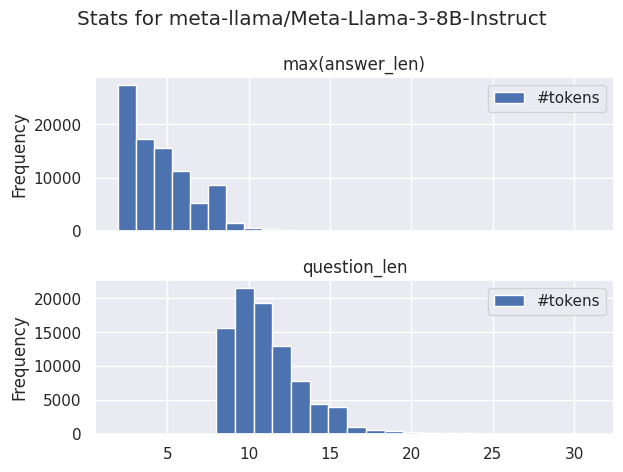

In [6]:
len_stats.melt(var_name="feature", value_name="#tokens").plot.hist(by="feature", bins=20, sharex=True)
plt.suptitle(f"Stats for {tokenizer_name}")
plt.tight_layout()
plt.show()